In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [3]:
def first_node(state: AgentState) -> AgentState:
    """This is the first node of the graph"""

    state['final'] = f"Hi, {state['name']}"
    return state

def second_node(state: AgentState) -> AgentState:
    """This is the second node of the graph"""

    state['final'] = state['final'] + f"You are {state['age']} years old"
    return state

In [5]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")

app = graph.compile()

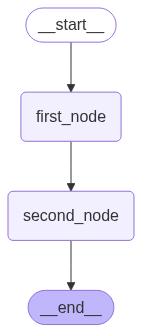

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
result = app.invoke({'name': 'Vaibhav', 'age': '21'})
result['final']

'Hi, VaibhavYou are 21 years old'

# Exercise

In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [8]:
class AgentState(TypedDict):
    name: str
    age: str
    skills: str
    final: str

In [9]:
def first_node(state: AgentState) -> AgentState:
    state['final'] = f"Hi, {state['name']}"
    return state

In [18]:
def second_node(state: AgentState) -> AgentState:
    state['final'] = state['final'] + f" You are {state['age']} years old"
    return state

In [19]:
def third_node(state: AgentState) -> AgentState:
    state['final'] = state['final'] + f" Your skills are {state['skills']}"
    return state

In [24]:
graph = StateGraph(AgentState)

graph.add_node("name", first_node)
graph.add_node("age", second_node)
graph.add_node("skills", third_node)

graph.set_entry_point("name")
graph.add_edge("name", "age")
graph.add_edge("age", "skills")
graph.set_finish_point("skills")

app = graph.compile()

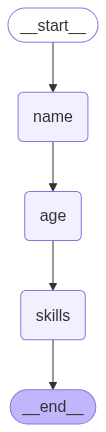

In [25]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
res = app.invoke({"name": 'Vaibhav', "age": '22', "skills": 'Python, CAD, Machine Learning'})

In [23]:
res['final']

'Hi, Vaibhav You are 22 years old Your skills are Python, CAD, Machine Learning'